In [53]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
raw=pd.read_csv("D:/homework/BA501_python_data.csv")

#How do you handle duplicate values in a dataset in Python?
print raw.shape
a=raw.drop_duplicates()
print a.shape

(73910, 7)
(73910, 7)


In [5]:
#You are given two tables - friend_request and request_accepted. 
#Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. 
#How will you determine the overall acceptance rate of requests?

#python
total_requests=friend_request.shape[0]
total_accepts=request_accepted.shape[0]
acceptance_rate=total_accepts/total_requests

#sql
select ( (select count(*) from request_accepted) / (select count(*) from friend_request) )


NameError: name 'friend_request' is not defined

In [93]:
raw.head()
my_data.date = pd.to_datetime(raw.date, format='%Y%m%d')
my_data.date.head()
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [113]:
def GetSeries(my_data, my_id, country, vertical):
    table = my_data[["date","spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country==country) & (my_data.vertical==vertical)]
    a=table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(a)
    return(series)


def PrintCumulativeTimeSeries(my_data,experiment_ids,country,vertical):
    # make sure our x-axis is consistent
    date_series = my_data.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    red_cts = GetSeries(my_data, experiment_ids[0],country, vertical)
    blue_cts = GetSeries(my_data, experiment_ids[1], country, vertical)
    
    fig, ax = plt.subplots()
    ax.plot(red_cts, color="red", label="red")
    ax.plot(blue_cts, color="blue", label = "blue")
    # some tweaks
    ax.set_ylim(0,100000)
    ax.set_title(country+" "+vertical+" "+" Red vs. Blue")
    ax.set_ylabel("Cumulative spend")
    ax.grid(True, which="both")
    # change legend
    ax.legend().get_texts()[0].set_text("Red")
    ax.legend().get_texts()[1].set_text("Blue")
    plt.gcf().autofmt_xdate()
    
    print str((red_cts[-1]-blue_cts[-1])/ blue_cts[-1]*100)+"%"

-4.35272685443%


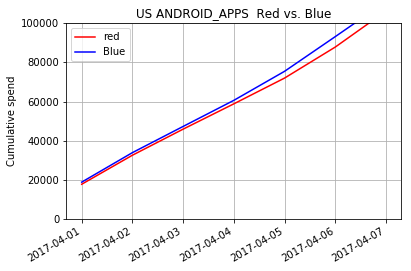

In [115]:
PrintCumulativeTimeSeries(my_data,[12624548,12624549],"US","ANDROID_APPS")